## E-Commerce: Identificar os perfis dos consumidores

### Tarefa

Segmente usuários com base em seus perfis de consumidor.

- Realize a análise exploratória de dados.
- Segmente os usuários com base no histórico de compras. Sinta-se à vontade para implementar suas próprias ideias para segmentar usuários. Pense em como a segmentação pode ajudar você a desenvolver ofertas mais personalizadas para diferentes usuários. Tente formar segmentos com base no que os usuários compram. Você pode analisar suas compras e segmentar as mercadorias de acordo com a categoria de produto a que pertencem.
- Formule e teste hipóteses estatísticas.

## Importando Dados e Bibliotecas

In [1]:
import pandas as pd
import matplotlib as plot
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Ellipse

In [2]:
import pandas as pd

file_path = 'C:\\Users\\Anderson\\OneDrive\\Área de Trabalho\\PROJETOS\\Datasets\\ecommerce_dataset_us.csv'

try:
    # Carregar o arquivo CSV ignorando linhas com erros
    df = pd.read_csv(file_path, delimiter='\t', on_bad_lines='skip')
    # Exibir as primeiras linhas do dataset
    print(df.head())
except FileNotFoundError:
    print("Arquivo não encontrado. Verifique o caminho do arquivo e tente novamente.")
except pd.errors.ParserError as e:
    print(f"Erro ao analisar o arquivo: {e}")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  
2  11/29/2018 08:26       2.75     17850.0  
3  11/29/2018 08:26       3.39     17850.0  
4  11/29/2018 08:26       3.39     17850.0  


### **Descrição dos dados**

O conjunto de dados contém o histórico de transações da Everything Plus, uma loja online que vende utensílios domésticos.

O arquivo `ecommerce_dataset_us.csv` contém as seguintes colunas:

`InvoiceNo` — identificador de pedido

`StockCode` — identificador de item

`Description` — nome de item

`Quantity`

`InvoiceDate` — data do pedido

`UnitPrice` — preço por item

`CustomerID`

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/07/2019 12:50,0.85,12680.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/07/2019 12:50,2.10,12680.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/07/2019 12:50,4.15,12680.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/07/2019 12:50,4.15,12680.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Limpando os Dados

Verificando valores ausente

In [6]:
missing_values = df.isnull().sum()
print("Valores ausentes por coluna:\n", missing_values)

Valores ausentes por coluna:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64


In [7]:
df[df['CustomerID'].isna()].head(50)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,11/29/2018 11:52,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,11/29/2018 14:32,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,11/29/2018 14:32,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,11/29/2018 14:32,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,11/29/2018 14:32,1.66,NaN
1447,536544,21790,VINTAGE SNAP CARDS,9,11/29/2018 14:32,1.66,NaN
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,11/29/2018 14:32,2.51,NaN
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,11/29/2018 14:32,0.43,NaN
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,11/29/2018 14:32,0.43,NaN
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,11/29/2018 14:32,0.43,NaN


Pedidos sem identificação do cliente (CustomerID):

Esses registros podem ser compras feitas por visitantes não registrados ou por clientes que não estavam logados durante a compra, também pode indicar um erro na captura dos dados de alguns pedidos.

Possíveis erros de sistema:

Registros com UnitPrice ou Description ausentes, como no primeiro registro mostrado (com UnitPrice = 0 e Description ausente), podem indicar problemas na base de dados.

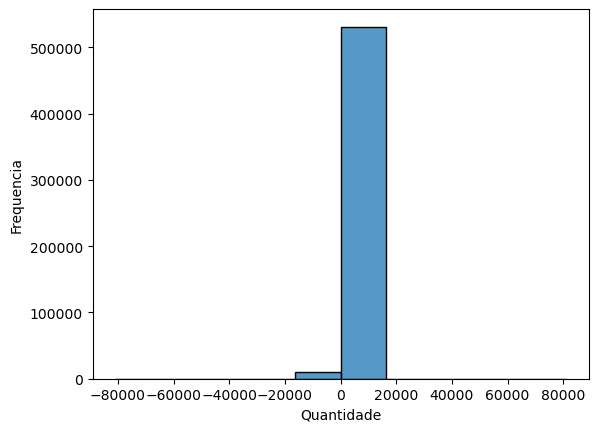

In [8]:
sns.histplot(data=df['Quantity'], bins=10)
plt.xlabel('Quantidade')
plt.ylabel('Frequencia')
plt.savefig('histograma_antes.png')
plt.show()

In [9]:
df.corr()

C:\Users\Anderson\AppData\Local\Temp\ipykernel_7740\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001235,-0.00360
UnitPrice,-0.001235,1.000000,-0.00456
CustomerID,-0.003600,-0.004560,1.00000


In [10]:
df.drop(df[df['Quantity']<=0].index, inplace=True)


In [11]:
df.drop(df[df['UnitPrice']<=0].index, inplace=True)


In [12]:
print(np.percentile(df['Quantity'], [0, 50, 99]))


[  1.   3. 100.]


In [13]:
df.drop(df[df['Quantity']>100].index, inplace=True)


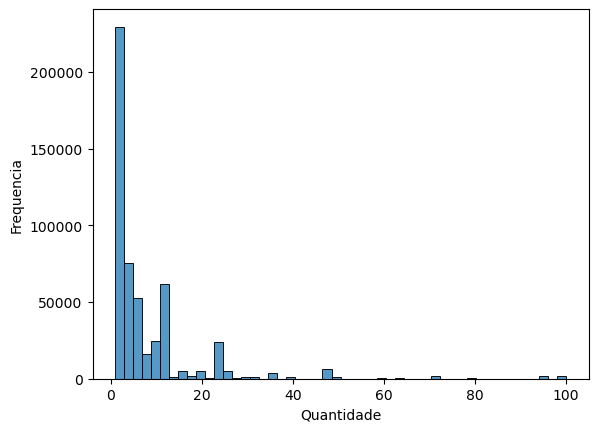

In [14]:
sns.histplot(data=df['Quantity'], bins=50)
plt.xlabel('Quantidade')
plt.ylabel('Frequencia')
plt.savefig('histograma_depois.png')
plt.show()

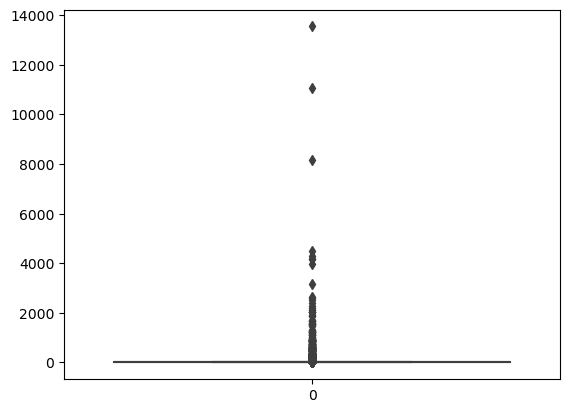

In [15]:
sns.boxplot(data=df['UnitPrice'])
plt.savefig('boxplot_antes.png')
plt.show()

In [16]:
df.drop(df[df['UnitPrice']<=0].index, inplace=True)

In [17]:
print(np.percentile(df['UnitPrice'], [0, 50, 99]))


[1.000e-03 2.100e+00 1.698e+01]


In [18]:
df.drop(df[df['UnitPrice']>3000].index, inplace=True)


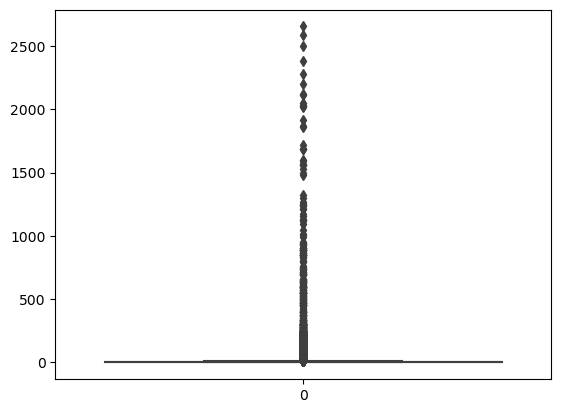

In [19]:
sns.boxplot(data=df['UnitPrice'])
plt.savefig('boxplot_depois.png')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525246 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    525246 non-null  object 
 1   StockCode    525246 non-null  object 
 2   Description  525246 non-null  object 
 3   Quantity     525246 non-null  int64  
 4   InvoiceDate  525246 non-null  object 
 5   UnitPrice    525246 non-null  float64
 6   CustomerID   393220 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 48.2+ MB


In [21]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,525246.000000,525246.000000,393220.000000
mean,7.937007,3.821998,15294.123020
std,12.558929,20.151452,1712.003375
min,1.000000,0.001000,12347.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.100000,15159.000000
75%,10.000000,4.130000,16794.000000
max,100.000000,2653.950000,18287.000000


In [22]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')


### Adicionando a coluna valor total da compra

In [23]:
df['TotalValue']=df['UnitPrice']*df['Quantity']


<Axes: xlabel='CustomerID', ylabel='TotalValue'>

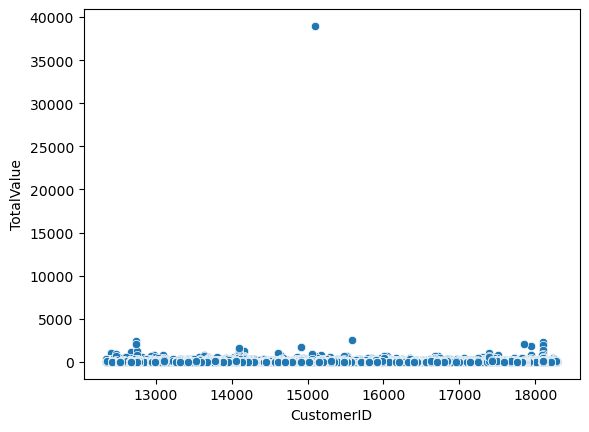

In [24]:
sns.scatterplot(data=df, x='CustomerID', y='TotalValue')


### Apagando a linha onde o valor total da compra foi aprox 40000.


In [25]:
df.drop(df[df['TotalValue']>35000].index, inplace=True)

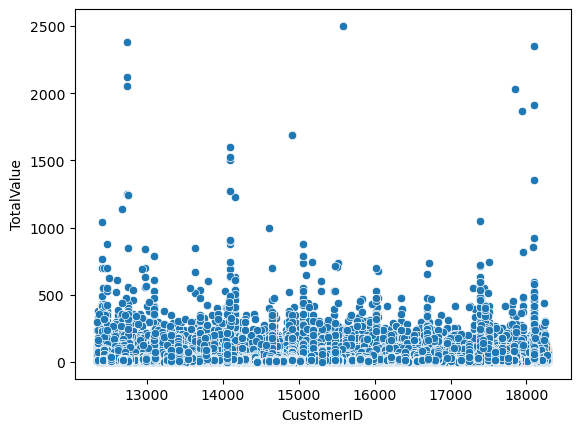

In [82]:
sns.scatterplot(data=df, x='CustomerID', y='TotalValue')
plt.savefig('CustomerID_valordecompra.png')


### Observando correlação dos dados enriquecidos e tratados

C:\Users\Anderson\AppData\Local\Temp\ipykernel_7740\2960163347.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=sns.cm.rocket_r)


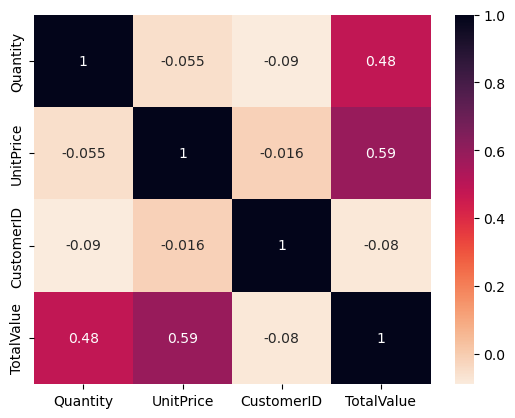

In [27]:
sns.heatmap(df.corr(), annot=True, cmap=sns.cm.rocket_r)
plt.show()


Em conclusão, pode-se observar que os dados analisados apresentam uma fraca correlação entre as colunas de quantidade e preço, bem como entre quantidade e mês, com coeficientes de correlação próximos a zero. No entanto, é importante destacar que a coluna "totalvalue", que foi adicionada como a soma do produto entre quantidade e preço, apresentou uma forte correlação com ambas as colunas originais, indicando uma relação mais significativa.

Apesar da fraca correlação entre os dados, não é um fator impeditivo para a criação de clusters. A análise de clusters é uma técnica estatística utilizada para agrupar dados similares com base em suas características, independentemente da correlação entre elas. Outros métodos, como a distância entre os pontos ou a similaridade de padrões, podem ser usados para identificar agrupamentos ou padrões nos dados, mesmo quando a correlação é baixa.

Portanto, embora a fraca correlação entre as colunas de quantidade, preço e mês possa indicar que essas variáveis não têm uma relação linear clara entre si, isso não impede a aplicação de técnicas de análise de clusters para identificar possíveis agrupamentos ou padrões nos dados. É importante considerar diferentes abordagens estatísticas e métodos de análise de dados para obter uma compreensão completa e detalhada dos padrões e insights presentes nos dados, independentemente da correlação entre as variáveis.

## Análise Exploratória

### Observando as distribuições

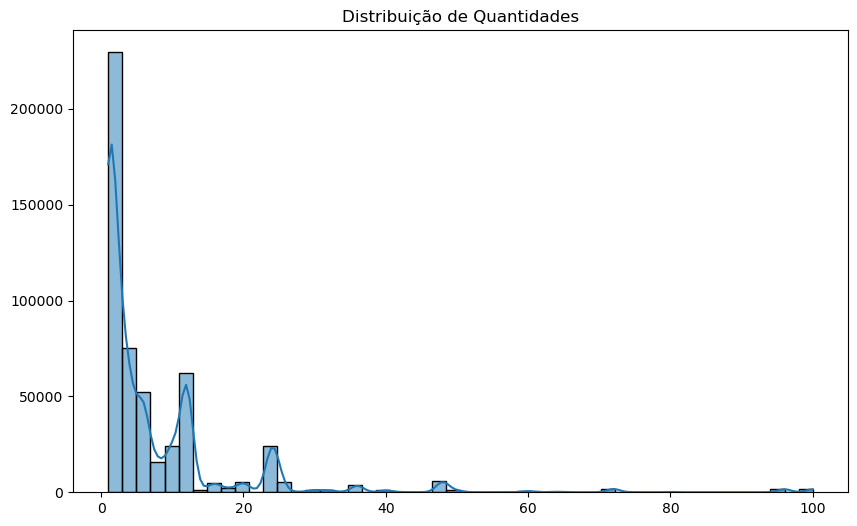

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribuição de Quantidades')
plt.xlabel('')
plt.ylabel('')
plt.savefig('Distribuição_de_Quantidades.png')
plt.show()

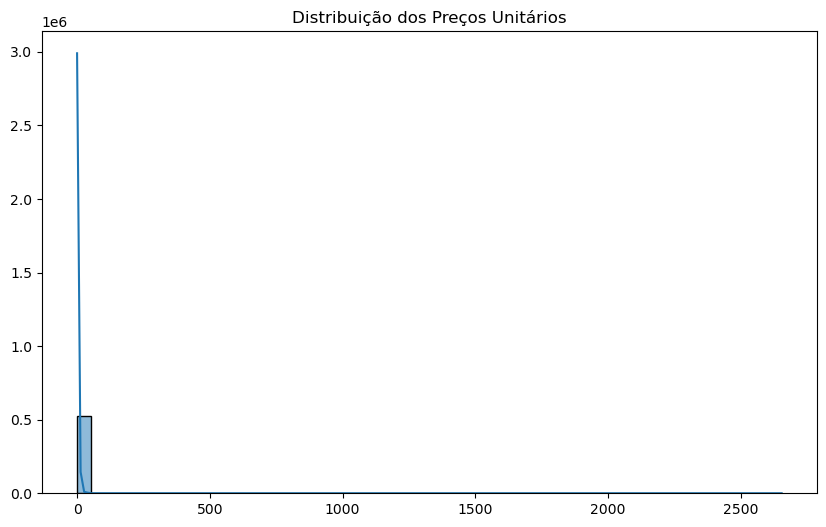

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribuição dos Preços Unitários')
plt.xlabel('')
plt.ylabel('')
plt.savefig('Distribuição_dos_Preços_Unitários.png')
plt.show()

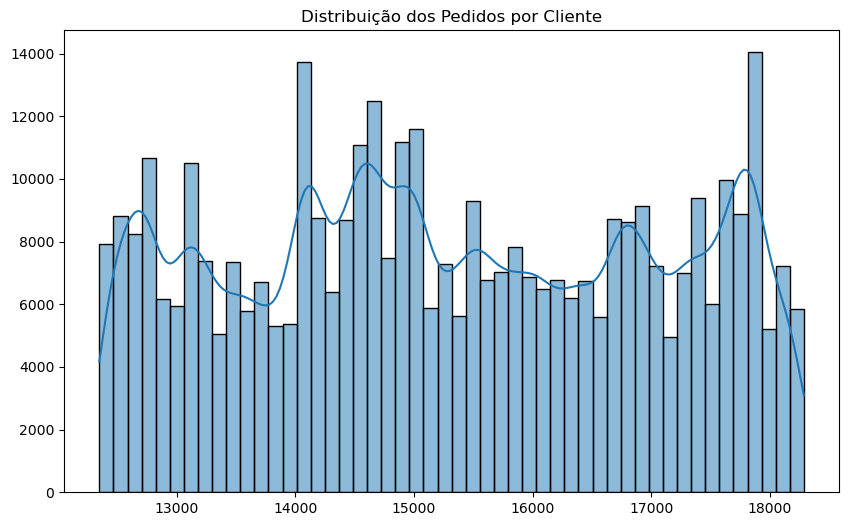

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerID'].dropna(), bins=50, kde=True)
plt.title('Distribuição dos Pedidos por Cliente')
plt.xlabel('')
plt.ylabel('')
plt.savefig('Distribuição_depedidosporcliente.png')
plt.show()

### Numero de Pedidos por Mês

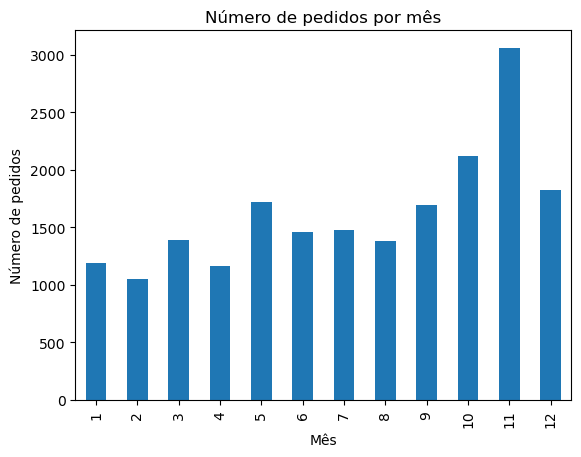

In [85]:
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
df['Month']=df['InvoiceDate'].dt.month

monthly_sales=df.groupby('Month')['InvoiceNo'].nunique()

monthly_sales.plot(kind='bar')
plt.title('Número de pedidos por mês')
plt.xlabel('Mês')
plt.ylabel('Número de pedidos')
plt.savefig('Número_de_pedidos_por_mês.png')
plt.show()


Podemos notar que a quantidade de pedidos é maior nos ultimos meses do ano. 

### TOP 10 Produtos mais Vendidos

In [88]:
top_products

Description
JUMBO BAG RED RETROSPOT               31943
WHITE HANGING HEART T-LIGHT HOLDER    24583
ASSORTED COLOUR BIRD ORNAMENT         22781
WORLD WAR 2 GLIDERS ASSTD DESIGNS     22023
PACK OF 72 RETROSPOT CAKE CASES       19052
VICTORIAN GLASS HANGING T-LIGHT       18974
LUNCH BAG RED RETROSPOT               18603
POPCORN HOLDER                        17869
PARTY BUNTING                         16063
JUMBO BAG PINK POLKADOT               15065
Name: Quantity, dtype: int64

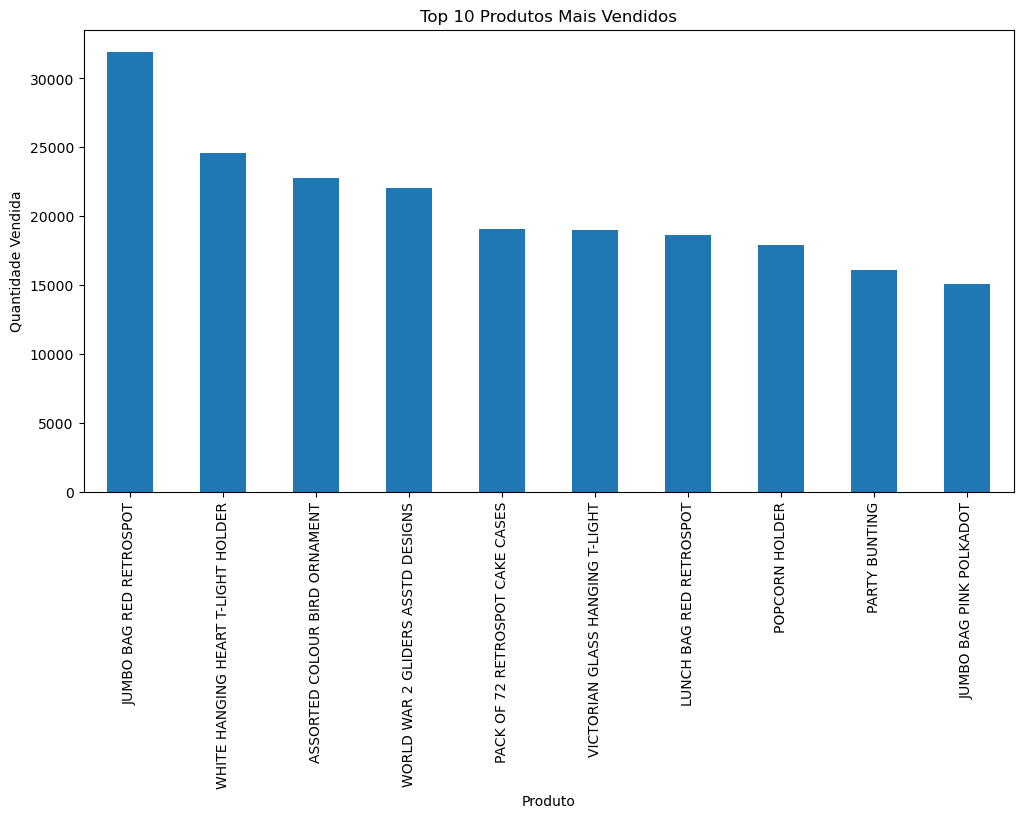

In [87]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.savefig('top10_produtos.png')
plt.show()


### Produtos Mais Lucrativos

In [91]:
top_profitable_products

Description
DOTCOM POSTAGE                        201743.60
REGENCY CAKESTAND 3 TIER              154906.14
PARTY BUNTING                          87705.05
POSTAGE                                69959.13
WHITE HANGING HEART T-LIGHT HOLDER     69883.73
JUMBO BAG RED RETROSPOT                64758.80
Manual                                 56159.16
PAPER CHAIN KIT 50'S CHRISTMAS         45454.91
CHILLI LIGHTS                          44072.72
ASSORTED COLOUR BIRD ORNAMENT          39145.65
Name: TotalPrice, dtype: float64

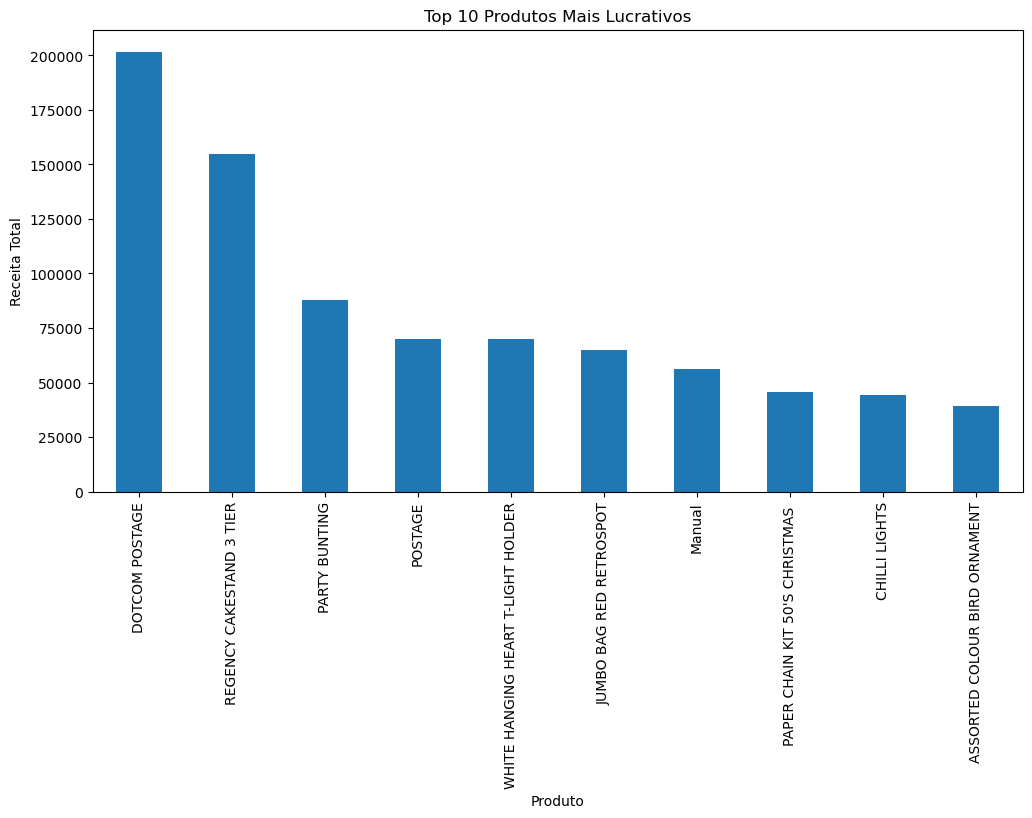

In [90]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
top_profitable_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_profitable_products.plot(kind='bar')
plt.title('Top 10 Produtos Mais Lucrativos')
plt.xlabel('Produto')
plt.ylabel('Receita Total')
plt.savefig('top10_maislucrativos.png')
plt.show()


Podemos notar que os produtos mais lucrativos não estão entre os itens mais vendidos.


## Clusterização com base no tipo de compra

### Padronizando os dados

Importando ferramentas para aprendizado não supervisionado de máquina e estatística para validação do modelo de ML.



In [34]:
from matplotlib.patches import Ellipse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

### Implementando modelo de machine learning para dividir os tipos de compras em n números


In [35]:
# Realizando padronização dos dados:
scaler = StandardScaler()
# Utilizando quantidade e preço para as colunas do modelo.
X_sc = scaler.fit_transform(df[['Quantity', 'UnitPrice']])
df_standard=pd.DataFrame()
df_standard['Quantity']=X_sc[:,0]
df_standard['UnitPrice']=X_sc[:,1]

In [36]:
df_standard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525245 entries, 0 to 525244
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Quantity   525245 non-null  float64
 1   UnitPrice  525245 non-null  float64
dtypes: float64(2)
memory usage: 8.0 MB


In [37]:
max_clusters = 10
kmeans = [KMeans(n_clusters=i) for i in range(1, max_clusters+1)]

Realizando método do cotovelo para visualizar o ponto de "cotovelo", onde o ganho de performance se torna menor para cada quantidade de clusters.

In [38]:
score = [kmeans[i].fit(df_standard).score(df_standard) for i in range(len(kmeans))]


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

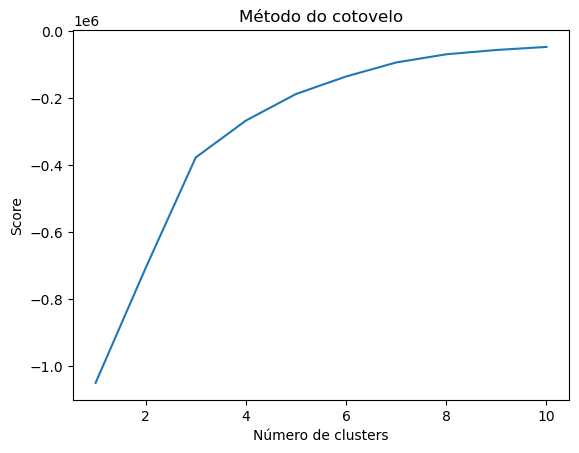

In [39]:
plt.plot(range(1, max_clusters+1), score)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.show()

Dessa forma, podemos utilizar o método do cotovelo para descobrir o número de clusters ideal para análise. O ponto de "cotovelo" é o número de clusters a partir do qual o ganho de performance do modelo de clusterização se torna menor, indicando que o número de clusters ideal foi atingido, nesse caso 3.

### Plotando o gráfico de coeficiente de silhueta versus número de clusters


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

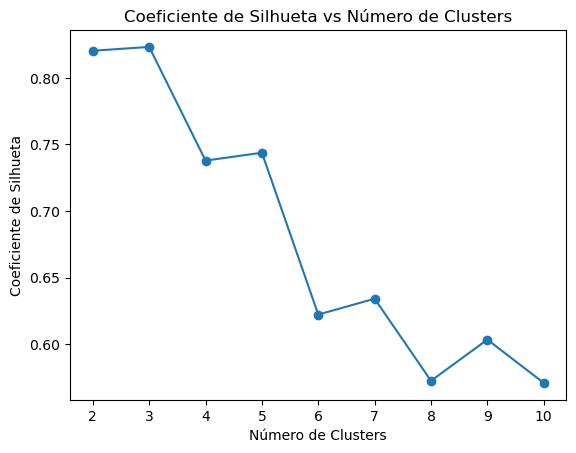

In [40]:
# Loop para variar o número de clusters de 2 a 10
df_standard_sample=df_standard.sample(n=10000, replace=False)
silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_standard_sample)
    # Obtendo os rótulos de cluster para cada ponto de dados
    labels = kmeans.labels_
    # Calculando o coeficiente de silhueta para os clusters atuais
    silhouette_avg = silhouette_score(df_standard_sample, labels)
    # Adicionando o coeficiente de silhueta à lista
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Coeficiente de Silhueta vs Número de Clusters')
plt.show()

O coeficiente de silhueta coincide parcialmente com nossa análise de cotovelo. Vamos dar uma olhada no resultado e caso os clusters não fiquem claros e funcionais repetimos com outra quantidade.

In [41]:
kmeans = KMeans(n_clusters=3)


### Treinando o modelo

In [42]:
kmeans.fit(df_standard)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

### Salvando os grupos resultados para cada compra.

In [43]:
rotulos = kmeans.predict(df_standard)


In [44]:
df_standard['rotulos'] = rotulos

df_standard['rotulos'].value_counts()
 
# Observando tamanho dos grupos 

0    504370
2     20732
1       143
Name: rotulos, dtype: int64

## Observando tipos de compras graficamente:


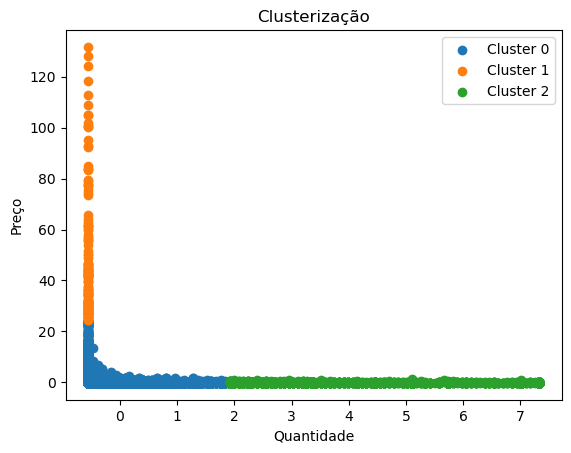

In [45]:
for i in range(3):
    cluster_df = df_standard[df_standard['rotulos'] == i]
    plt.scatter(cluster_df['Quantity'],cluster_df['UnitPrice'],label=f'Cluster {i}')
    
plt.legend()
plt.title('Clusterização')
plt.xlabel('Quantidade')
plt.ylabel('Preço')
plt.savefig('clusters_compras.png')

plt.show()

Visualmente a segmentação das compras está bem definida.



In [46]:
df_standard.pivot_table(index='rotulos', values=['Quantity', 'UnitPrice'], aggfunc='mean')


,Quantity,UnitPrice
rotulos,,
0,-0.160409,-0.009247
1,-0.552358,48.975793
2,3.906260,-0.112852


Podemos descrever os 3 grupos de compras assim:
* Grupo 0: Este grupo possui uma quantidade de -0,160409 e um preço unitário de -0,009247. Ambos os valores estão abaixo da média, sugerindo que este grupo pode representar um segmento de clientes com compras de baixa quantidade e baixo valor unitário.

* Grupo 1: Este grupo possui uma quantidade de -0,552358 e um preço unitário de 48,975793. Embora a quantidade esteja abaixo da média, o valor unitário é significativamente maior do que os outros grupos, indicando que este grupo pode representar um segmento de clientes com compras de baixa quantidade, mas de alto valor unitário.

* Grupo 2: Este grupo possui uma quantidade de 3,906260 e um preço unitário de -0,112852. A quantidade está significativamente acima da média, enquanto o preço unitário está ligeiramente abaixo da média, sugerindo que este grupo pode representar um segmento de clientes com compras de alta quantidade, mas de baixo valor unitário. Esses clientes podem estar focados em comprar em volume, mas com foco em itens de menor preço unitário.

### Salvando rotulos no df para possibilitar a comparação de itens do df original com os clusters.


In [47]:
df['rotulos']=rotulos

Pivot table comparando lucros com grupos


In [48]:
df.pivot_table(index='rotulos', values='TotalValue', aggfunc=['mean', 'count'])


,mean,count
,TotalValue,TotalValue
rotulos,,
0,13.260606,504370
1,989.789091,143
2,86.690657,20732


O grupo com maior renda gerada é o Grupo 2. Esse grupo é composto por clientes que fazem poucas compras, mas cada compra tem um valor elevado, com uma média de quase 990 por transação. A equipe de marketing pode explorar oportunidades de direcionar campanhas específicas para esses clientes de alto valor, oferecendo produtos premium, serviços exclusivos, ou programas de fidelidade que aumentem a retenção. Além disso, estratégias podem ser implementadas para atrair novos clientes que também estejam dispostos a fazer compras de alto valor, possivelmente através de marketing personalizado, ofertas especiais ou parcerias com marcas de luxo. Alternativamente, pode-se investigar se é possível aumentar o ticket médio do Grupo 1, que tem um volume moderado de transações, mas um valor total ainda distante do Grupo 2.

### Entendendo como o número de pedidos se relaciona com o tempo


In [49]:
from pandas.api.types import CategoricalDtype


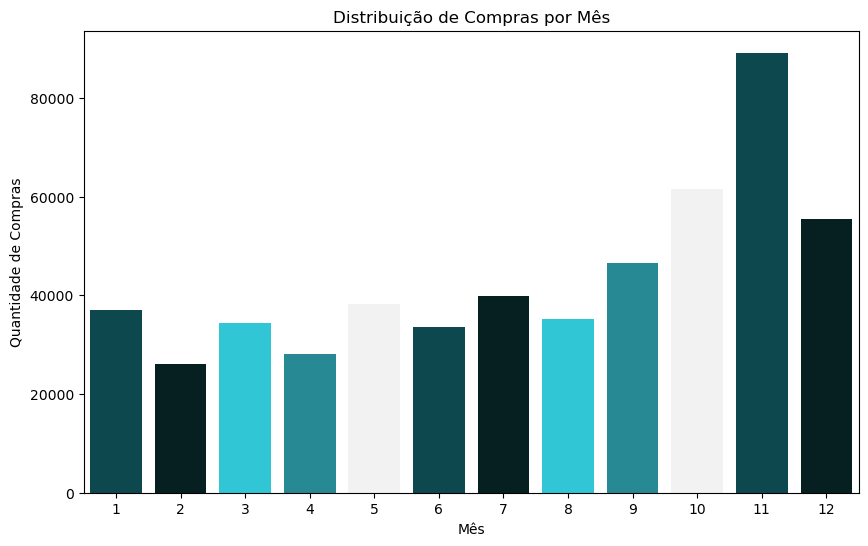

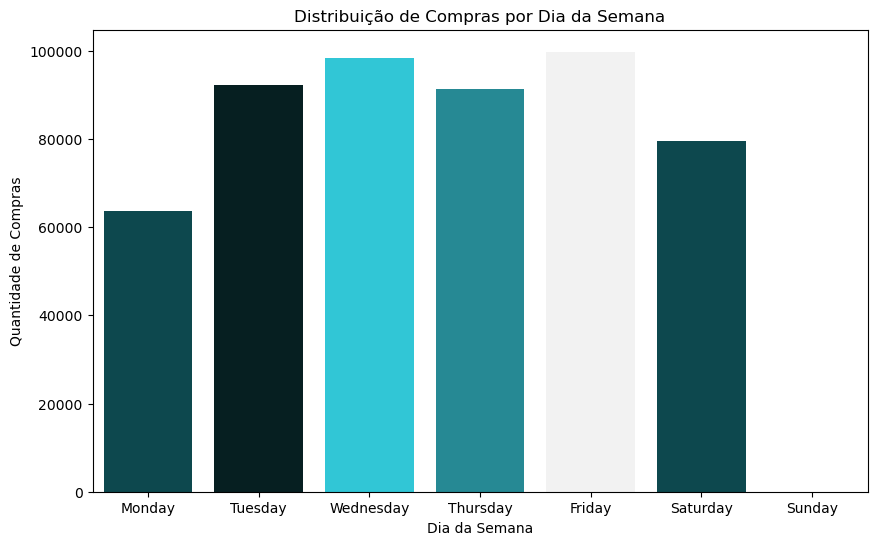

In [50]:
dias_da_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordem_dias_da_semana = CategoricalDtype(categories=dias_da_semana, ordered=True)

df['Mês'] = df['InvoiceDate'].dt.month
df_grouped = df.groupby('Mês')['Quantity'].count().reset_index()

# Criando o gráfico de barras com a distribuição de quantidade de itens por mês

plt.figure(figsize=(10, 6))

sns.barplot(data=df_grouped, x='Mês', y='Quantity', palette=['#025159', '#012326', '#16DCF2', '#1497A6', '#F2F2F2'])
plt.xlabel('Mês')
plt.ylabel('Quantidade de Compras')
plt.title('Distribuição de Compras por Mês')
plt.savefig('compras_mes.png')
plt.show()
df['day_of_week'] = df['InvoiceDate'].dt.day_name().astype(ordem_dias_da_semana)

# Agrupando os dados por dia da semana e calcular a soma da coluna 'Quantity' para cada grupo
df_grouped = df.groupby('day_of_week')['Quantity'].count().reset_index()

# Criando o gráfico de barras com a distribuição de quantidade de itens por dia da semana
plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='day_of_week', y='Quantity', palette=['#025159', '#012326', '#16DCF2', '#1497A6', '#F2F2F2'])
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Compras')
plt.title('Distribuição de Compras por Dia da Semana')
plt.savefig('compras_dia.png')
plt.show()

## Criando Segmentação dos Clientes

### Criando métricas para realizar a clusterização baseadas em RFM (Recência, Frequência e valor Monetário) e no tipo de item da loja.

* Será treinado um modelo de processamento de linguagem natural para classificar os items.

* Será calculado a moda do tipo de item o qual o cliente costuma comprar para rotulá-lo.

* Com base nos dados será calculado em quartis e avaliado o RFM_score de cada cliente.

### Utilizando nlp para formar grupos de tipos de itens.

In [51]:
import pandas as pd
import datetime as dt
from sklearn.cluster import KMeans

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Calcular o valor total de cada transação
df['TotalValue'] = df['Quantity'] * df['UnitPrice']

# Data de referência para calcular a recência
today_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Calcular Recência, Frequência e Valor Monetário para cada cliente
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalValue': 'sum'
})

# Renomear colunas
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalValue': 'Monetary'
}, inplace=True)

# Função para calcular os quartis
def rfm_quartiles(x, quintiles):
    if x <= quintiles[0.25]:
        return 1
    elif x <= quintiles[0.50]:
        return 2
    elif x <= quintiles[0.75]:
        return 3
    else:
        return 4

# Calcular os quartis para Recência, Frequência e Valor Monetário
rfm['R_quartile'] = rfm['Recency'].apply(rfm_quartiles, args=(rfm['Recency'].quantile([0.25, 0.5, 0.75]),))
rfm['F_quartile'] = rfm['Frequency'].apply(rfm_quartiles, args=(rfm['Frequency'].quantile([0.25, 0.5, 0.75]),))
rfm['M_quartile'] = rfm['Monetary'].apply(rfm_quartiles, args=(rfm['Monetary'].quantile([0.25, 0.5, 0.75]),))

# Calcular o RFM score combinado
rfm['RFM_Score'] = rfm['R_quartile'].astype(str) + rfm['F_quartile'].astype(str) + rfm['M_quartile'].astype(str)

# Exibir as primeiras linhas do DataFrame RFM
print(rfm.head())

# Clusterização dos Clientes
# Selecionar as colunas relevantes para a clusterização
rfm_cluster = rfm[['Recency', 'Frequency', 'Monetary']]

# Treinar o modelo K-means
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_cluster)

# Exibir as primeiras linhas do DataFrame RFM com os clusters
print(rfm.head())

# Exibir as médias de RFM por cluster
cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

print(cluster_summary)


            Recency  Frequency  Monetary  R_quartile  F_quartile  M_quartile  \
CustomerID                                                                     
12347.0           2        181   4060.40           1           4           4   
12348.0          75         20   1195.08           3           2           3   
12349.0          19         73   1757.55           2           3           4   
12350.0         310         17    334.40           4           1           2   
12352.0          36         85   2506.04           2           3           4   

           RFM_Score  
CustomerID            
12347.0          144  
12348.0          323  
12349.0          234  
12350.0          412  
12352.0          234  


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            Recency  Frequency  Monetary  R_quartile  F_quartile  M_quartile  \
CustomerID                                                                     
12347.0           2        181   4060.40           1           4           4   
12348.0          75         20   1195.08           3           2           3   
12349.0          19         73   1757.55           2           3           4   
12350.0         310         17    334.40           4           1           2   
12352.0          36         85   2506.04           2           3           4   

           RFM_Score  Cluster  
CustomerID                     
12347.0          144        0  
12348.0          323        0  
12349.0          234        0  
12350.0          412        0  
12352.0          234        0  
         Recency  Frequency   Monetary
Cluster                               
0          93.17      83.04    1367.18
1           8.27    1398.59   40780.45
2           1.50    3560.00  141640.59


Questionar o chat para entender as diferenças nos códigos e entender o impacto delas

In [52]:

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string


# Baixar os recursos necessários do nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anderson\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anderson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [53]:
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha() and word not in stop_words and word not in string.punctuation]
    return tokens

In [54]:
doc = df['Description'].unique()
preprocessed_doc = [preprocess(description) for description in doc]

In [55]:
vectorizer = CountVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
doc_term_matrix = vectorizer.fit_transform(preprocessed_doc)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [56]:
lda_model = LatentDirichletAllocation(n_components=4, random_state=42)
lda_model.fit(doc_term_matrix)


LatentDirichletAllocation(n_components=4, random_state=42)

In [57]:
categories = lda_model.transform(doc_term_matrix).argmax(axis=1)


In [58]:
doc_by_cat = {}
for i, category in enumerate(categories):
    if category not in doc_by_cat:
        doc_by_cat[category] = []
    doc_by_cat[category].append(doc[i])

In [59]:
def map_type(description):
    for category, descriptions in doc_by_cat.items():
        if description in descriptions:
            return category
    return -1

In [60]:
df['Tipo_Item'] = df['Description'].apply(map_type)


In [61]:
print(df.head(20))


   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5     536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6     536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7     536366     22633               HAND WARMER UNION JACK         6   
8     536366     22632            HAND WARMER RED POLKA DOT         6   
9     536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   
10    536367     22745           POPPY'S PLAYHOUSE BEDROOM          6   
11    536367     22748            POPPY'S PLAYHOUSE KITCHEN         6   
12    536367     22749    FELTCRAFT PRINCESS CHARLO

## Calculando métricas RFM para os clientes

* Em resumo, a análise RFM é uma ferramenta importante para estudar os clientes, permitindo que as empresas identifiquem os clientes mais valiosos, personalizem suas estratégias de marketing, otimizem seus recursos e tomem decisões informadas para impulsionar o crescimento dos negócios.

### Calculando a Recência como a diferença entre a data mais recente na base de dados e a data de cada transação


In [62]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

data_referencia = df['InvoiceDate'].max() + pd.DateOffset(days=1)
df['Recencia'] = (data_referencia - df['InvoiceDate']).dt.days

### Calculando a Frequência como o número de transações realizadas por cada cliente


In [63]:
df_rfm = df.groupby('CustomerID').agg({'Recencia': 'min', 'InvoiceNo': 'nunique', 'TotalValue': 'sum'})

df_rfm.rename(columns={'InvoiceNo': 'Frequencia', 'TotalValue': 'ValorMonetario'}, inplace=True)

### pontuações RFM e os segmentos

In [64]:
df_rfm['R'] = pd.qcut(df_rfm['Recencia'], q=4, labels=False, duplicates='drop')
df_rfm['F'] = pd.qcut(df_rfm['Frequencia'], q=4, labels=False, duplicates='drop')
df_rfm['M'] = pd.qcut(df_rfm['ValorMonetario'], q=4, labels=False, duplicates='drop')

df_rfm['RFM_Total'] = df_rfm['R'] + df_rfm['F'] + df_rfm['M']

print(df_rfm.head())

            Recencia  Frequencia  ValorMonetario  R  F  M  RFM_Total
CustomerID                                                          
12347.0            2           7         4060.40  0  2  3          5
12348.0           75           4         1195.08  2  1  2          5
12349.0           19           1         1757.55  1  0  3          4
12350.0          310           1          334.40  3  0  1          4
12352.0           36           8         2506.04  1  2  3          6


In [65]:
df_rfm=df_rfm.reset_index()


In [66]:
# Salvando moda do tipo do item
df_moda_tipo_item = df.groupby('CustomerID')['Tipo_Item'].apply(lambda x: x.mode()[0]).reset_index()


In [67]:
# Salvando a moda
df_rfm=pd.merge(df_rfm, df_moda_tipo_item, on='CustomerID', how='inner')

In [68]:
# Criando colunas para variáveis binárias
df_dummies=pd.get_dummies(df_rfm['Tipo_Item'])

# Concatenando as colunas one-hot no DataFrame original
df_rfm = pd.concat([df_rfm, df_dummies], axis=1)

In [69]:
df_rfm.head()

,CustomerID,Recencia,Frequencia,ValorMonetario,R,F,M,RFM_Total,Tipo_Item,0,1,2,3
0,12347.0,2,7,4060.40,0,2,3,5,0,1,0,0,0
1,12348.0,75,4,1195.08,2,1,2,5,0,1,0,0,0
2,12349.0,19,1,1757.55,1,0,3,4,2,0,0,1,0
3,12350.0,310,1,334.40,3,0,1,4,2,0,0,1,0
4,12352.0,36,8,2506.04,1,2,3,6,1,0,1,0,0


In [70]:
df_rfm=df_rfm.rename(columns= {0:'0',1: '1',
    2: '2',
    3: '3'})

### Montando modelo com colunas de RFM e tipo de item.


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

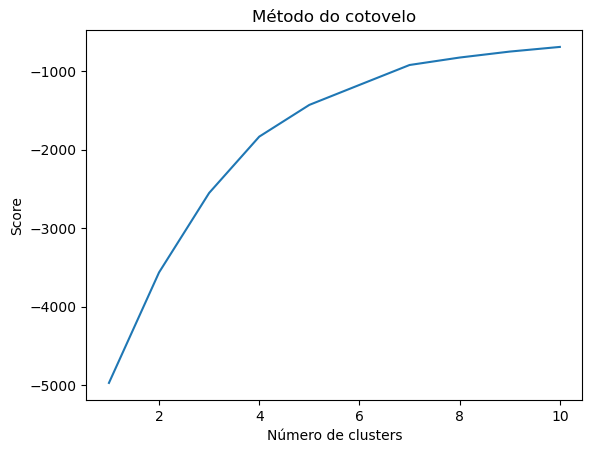

In [71]:
from sklearn.preprocessing import MinMaxScaler

# Criando uma instância do MinMaxScaler
scaler = MinMaxScaler()
# Normalizando dados
df_rfm[['R', 'F', 'M']] = scaler.fit_transform(df_rfm[['R', 'F', 'M']])
max_clusters = 10
kmeans = [KMeans(n_clusters=i) for i in range(1, max_clusters+1)]
# Treinando
score = [kmeans[i].fit(df_rfm[['R', 'F', 'M', '0','1','2','3']]).score(df_rfm[['R', 'F', 'M', '0','1','2','3']]) for i in range(len(kmeans))]
plt.plot(range(1, max_clusters+1), score)
plt.title('Método do cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

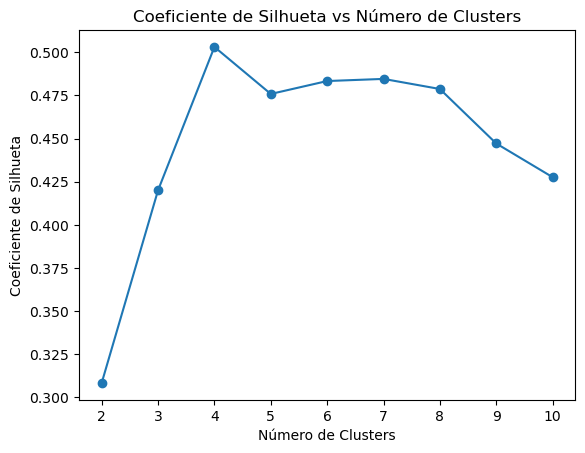

In [72]:
silhouette_scores = []

for n_clusters in range(2, 11):
    # Iniciando
    kmeans = KMeans(n_clusters=n_clusters)
    # Ajustando
    kmeans.fit(df_rfm[['R', 'F', 'M', '0', '1', '2', '3']])
    labels = kmeans.labels_
    # Calculando
    silhouette_avg = silhouette_score(df_rfm[['R', 'F', 'M', '0', '1', '2', '3']], labels)
    silhouette_scores.append(silhouette_avg)

# Plotando o gráfico de coeficiente de silhueta versus número de clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Coeficiente de Silhueta vs Número de Clusters')
plt.show()

Utilizando número de clusters = 4 baseado nos testes.

In [73]:
df_rfm_cluster = df_rfm[['R', 'F', 'M', '0', '1', '2', '3']]


In [74]:
kmeans = KMeans(n_clusters=4, random_state=42) 

# Treinando
kmeans.fit(df_rfm_cluster)

# Obtendo rótulos
df_rfm_cluster['Cluster'] = kmeans.labels_

# Exibindo os resultados do modelo
print(df_rfm_cluster.head(10))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


          R    F         M  0  1  2  3  Cluster
0  0.000000  1.0  1.000000  1  0  0  0        2
1  0.666667  0.5  0.666667  1  0  0  0        2
2  0.333333  0.0  1.000000  0  0  1  0        1
3  1.000000  0.0  0.333333  0  0  1  0        1
4  0.333333  1.0  1.000000  0  1  0  0        3
5  1.000000  0.0  0.000000  1  0  0  0        2
6  1.000000  0.0  0.666667  1  0  0  0        2
7  1.000000  0.0  0.333333  1  0  0  0        2
8  0.333333  0.5  1.000000  1  0  0  0        2
9  0.333333  0.0  1.000000  0  0  1  0        1


C:\Users\Anderson\AppData\Local\Temp\ipykernel_7740\1013876375.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm_cluster['Cluster'] = kmeans.labels_


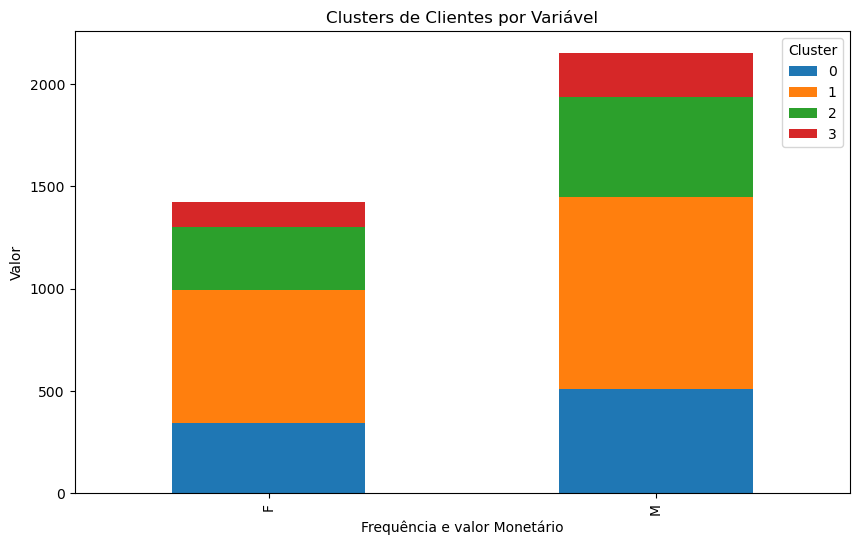

In [75]:
# Calculando a contagem por frequência e valor monetário.
count_df = df_rfm_cluster.groupby(['Cluster']).agg({'F': 'sum', 'M': 'sum'})

# Transpondo o DataFrame para ter os clusters como índices e as variáveis como colunas
count_df = count_df.T

# Criando o gráfico de barras empilhadas
count_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Exibindo o gráfico
plt.xlabel('Frequência e valor Monetário')
plt.ylabel('Valor')
plt.title('Clusters de Clientes por Variável')
plt.legend(title='Cluster')
plt.savefig('valor_clusters.png')
plt.show()

#### Estudando os clusters


In [76]:
df_rfm_cluster.pivot_table(index='Cluster', values=['R', 'F', 'M', '0', '1', '2', '3'], aggfunc='mean')


,0,1,2,3,F,M,R
Cluster,,,,,,,
0,0,0,0,1,0.305183,0.456360,0.520107
1,0,0,1,0,0.404394,0.581271,0.465759
2,1,0,0,0,0.299609,0.477680,0.513522
3,0,1,0,0,0.220183,0.390214,0.500306


Podemos observar que o cluster 0 tende a gerar mais valor monetário e também possuem maior frequência de compra. Esses clientes adoram comprar da categoria Lar Aconchegante, é uma boa aposta para a Everything plus dar uma olhada em como esses clientes geram lucro e o que podem fazer para os outros grupos alcançarem um número parecido.

In [77]:
df_rfm['Cluster'] = df_rfm_cluster['Cluster']


#### Calculando média dos fatores FMR


In [78]:
df_rfm.pivot_table(index='Cluster', values=['R', 'F', 'M', 'RFM_Total'], aggfunc='mean')


,F,M,R,RFM_Total
Cluster,,,,
0,0.305183,0.456360,0.520107,3.539768
1,0.404394,0.581271,0.465759,3.949876
2,0.299609,0.477680,0.513522,3.572825
3,0.220183,0.390214,0.500306,3.111927


Para o Cluster 0 obtemos um valor monetário maior e frequência também. Provavelmente são clientes que são adeptos e tem hábito de comprar na Everything Plus. Podemos utilizar essa análise, por exemplo, para focar o marketing nos clientes onde o foco dos itens comprados são da categoria natalina. (Cluster 2)

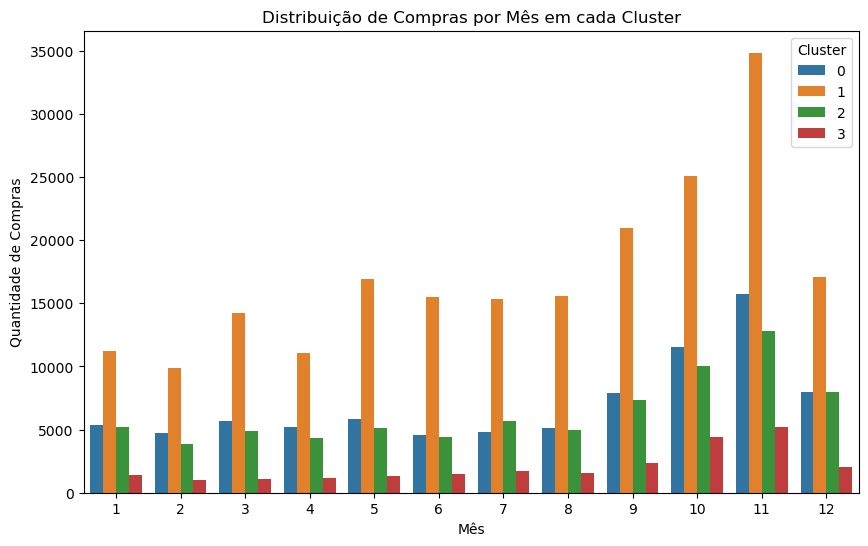

In [79]:
df_combined = df.merge(df_rfm, on='CustomerID')

df_filtered = df_combined[df_combined['Cluster'].isin([0, 1, 2, 3])]
df_grouped = df_filtered.groupby(['Cluster', 'Mês'])['Quantity'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_grouped, x='Mês', y='Quantity', hue='Cluster')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Compras')
plt.title('Distribuição de Compras por Mês em cada Cluster')
plt.savefig('users_mes_clusters.png')
plt.show()

É perceptível que no mês 11 o único cluster a não aumentar o número de vendas é o 3, referente a venda de utensílios de cozinha. Uma recomendação para everything plus seria aumentar o número de itens de cozinha tematizados para época, como pratos natalinos.

Podemos observar também uma disparada dos grupos 0 e 2, referentes a Casa aconchegante e Artesanato/ Natal. É presumível que podem ter aumentado de maneira desproporcional aos outros por serem boas opções de presentes e para decorar a casa.

### Analisando por Segmento


In [80]:
segmentos_rfm = {
    'Melhor': (df_rfm['RFM_Total'] >= 7).map({True: 'Sim', False: 'Não'}),
    'Alto valor': (df_rfm['M'] == 1).map({True: 'Sim', False: 'Não'}),
    'Alta frequência': (df_rfm['F'] >= 0.5).map({True: 'Sim', False: 'Não'}),
    'Inativo': (df_rfm['R'] == 1).map({True: 'Sim', False: 'Não'})}
for segmento, condicao in segmentos_rfm.items():
    df_rfm[segmento] = condicao

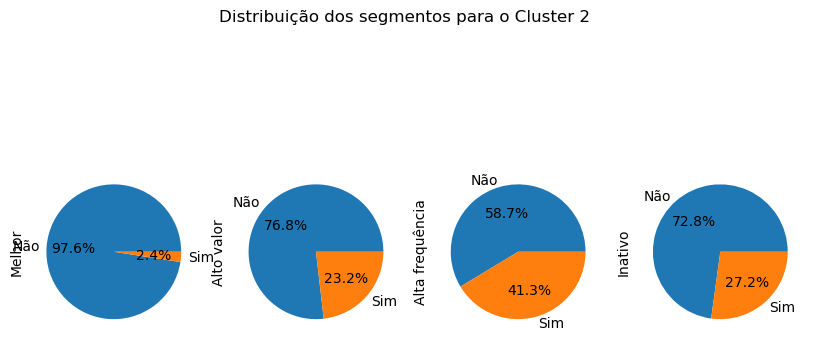

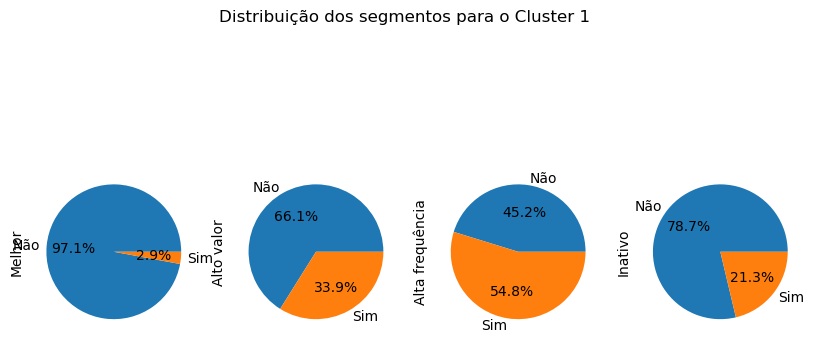

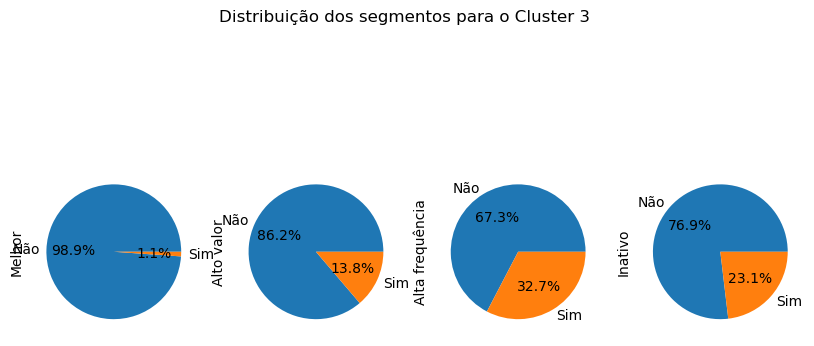

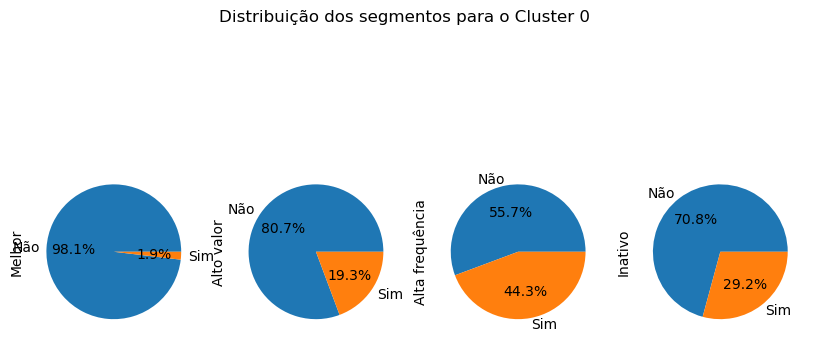

In [81]:
for cluster in df_rfm['Cluster'].unique():
    cluster_counts = df_rfm[df_rfm['Cluster'] == cluster].loc[:, 'Melhor':'Inativo'].apply(pd.Series.value_counts)
    cluster_counts.plot(kind='pie', subplots=True, figsize=(10, 5), legend=False, autopct='%1.1f%%')
    plt.suptitle(f'Distribuição dos segmentos para o Cluster {cluster}')
    plt.show()

Os indicadores RFM indicam que para um maior valor monetário, recência e atividade a Everything plus:

* Deve buscar incentivar uma maior adesão de clientes do grupo 0.

## Conclusão
Com esses resultados, é possível entender melhor os perfis dos clientes e promover certos tipos de itens em determinadas épocas do ano. É importante continuar analisando os dados e buscando maneiras de melhorar a experiência do cliente na loja online.

### Potencializar Everything Plus com personalização de marketing para cada perfil e tipo de compra

Com base nos resultados obtidos algumas melhorias podem ser implementadas depedendo do que a Everything deseja.

Como por exemplo:

Personalizar o Marketing no natal principalmente para os clientes do grupo 2, os quais já usualmente compram itens do tipo.

Incentivar a compra de itens mais caros, mesmo que isoladamente costuma trazar mais lucro para empresa em comparação com vários itens baratos em atacado.

Realizar uma análise mais profunda dos clientes que compram itens da categoria Lar aconchegante e entender por que geram mais renda para conseguir assim aplicar nos outros grupos.

Aumentar o número de itens de cozinha tematizados para época, como pratos natalinos para aumentar o número de vendas do grupo 3 também próximo ao fim do ano.

Os indicadores RFM indicam que para um maior valor monetário, recência e atividade a Everything plus:

Deve buscar incentivar uma maior adesão de clientes do grupo 0.